In [1]:
import numpy as np
import datetime as dt

In [8]:
def modulate(date, ux=193):
    import astropy.units as u
    from sunpy.net import Fido, attrs
    import sunpy.map

    from aiapy.calibrate import register, update_pointing, normalize_exposure
    q = Fido.search(
        attrs.Time(date.strftime("%Y-%m-%dT%H:%M:%S"), (date + dt.timedelta(seconds=11)).strftime("%Y-%m-%dT%H:%M:%S")),
        attrs.Instrument("AIA"),
        attrs.Wavelength(wavemin=ux*u.angstrom, wavemax=ux*u.angstrom),
    )
    m = sunpy.map.Map(Fido.fetch(q))
    m_updated_pointing = update_pointing(m)
    m_registered = register(m_updated_pointing)
    m_normalized = normalize_exposure(m_registered)
    return m_normalized, m

def to_png(date, fname, ux=193):
    import matplotlib.pyplot as plt
    import cv2
    import os
    norm, m = modulate(date, ux)
    fig, ax = plt.subplots(nrows=1,ncols=1,dpi=100,figsize=(2048/100, 2048/100))
    norm.plot(annotate=False, axes=ax, vmin=3)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.savefig("x.png",bbox_inches="tight")
    im = cv2.resize(cv2.imread("x.png"), (1024, 1024))
    im = im[10:-10,10:-10]
    os.remove("x.png")
    cv2.imwrite(fname, im)
    return

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

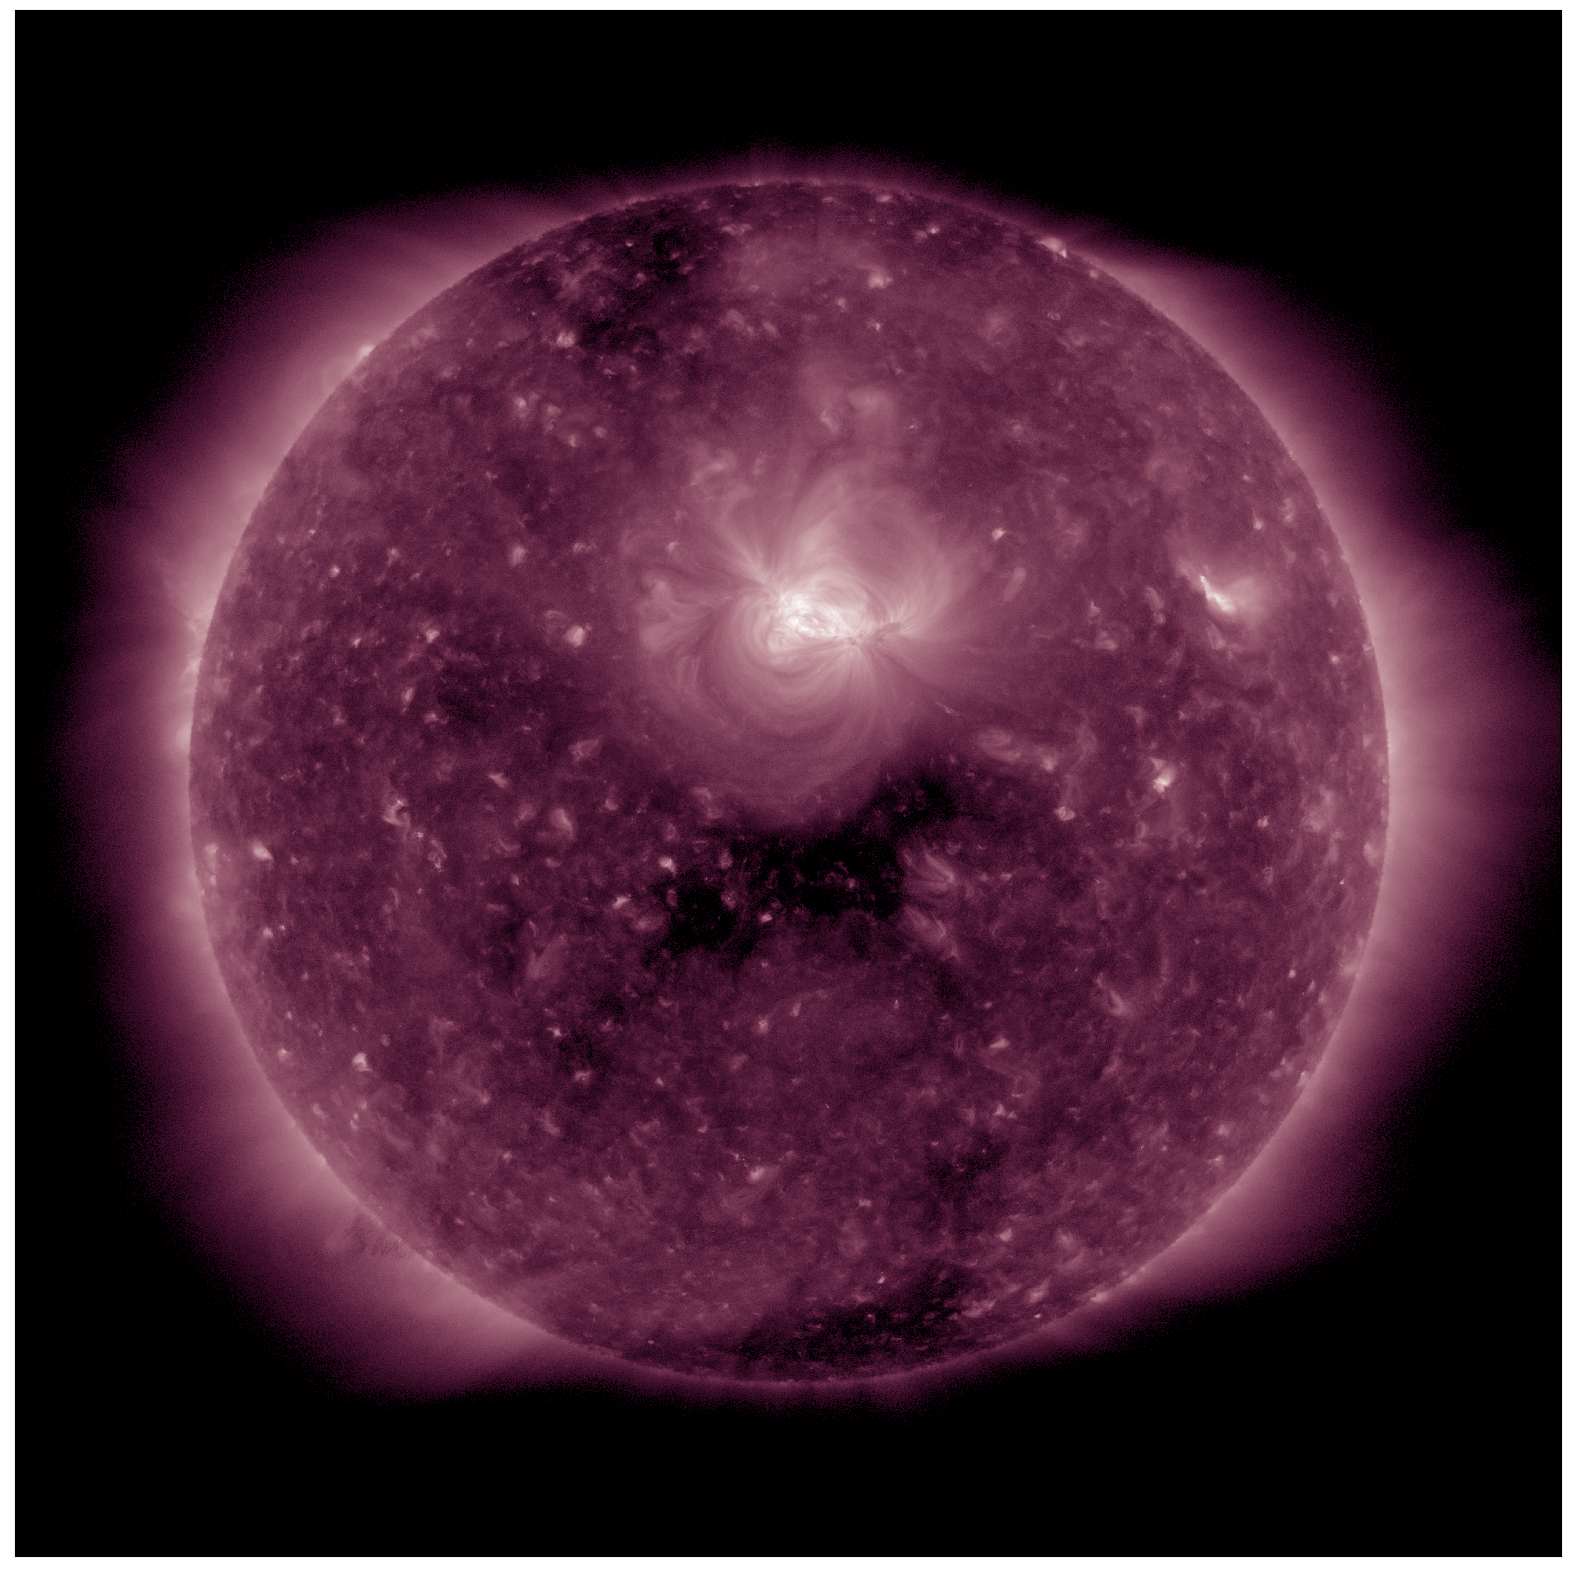

In [9]:
to_png(dt.datetime(2018,5,30,12), "y.png", 211)